In [73]:
import pandas as pd
data = pd.read_csv('winequality-red.csv',delimiter=';')

print(data.quality.value_counts())
data.head()
data.info()
data.describe()
params={
"fixed acidity": "фиксированная кислотность",
"volatile acidity": "летучая кислотность",
"citric acid": "лимонная кислота",
"residual sugar": "остаточный сахар",
"chlorides": "хлориды",
"free sulfur dioxide": "свободный диоксид серы",
"total sulfur dioxide": "общий диоксид серы",
"density": "плотность",
"pH": "pH",
"sulphates": "сульфаты",
"alcohol": "алкоголь",
"quality": "качество"
}

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
bins = [2, 4, 6, 9]  # Группы: 3-4,5-6, 7-8
labels = ['плохое', 'среднее', 'хорошее']
data['quality_category_label'] = pd.cut(data['quality'], bins=bins, labels=labels)
print(data.quality.value_counts())
print(data.quality_category_label.value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
quality_category_label
среднее    1319
хорошее     217
плохое       63
Name: count, dtype: int64


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['плохое', 'среднее', 'хорошее'])
data['quality_category']=le.transform(data['quality_category_label'])

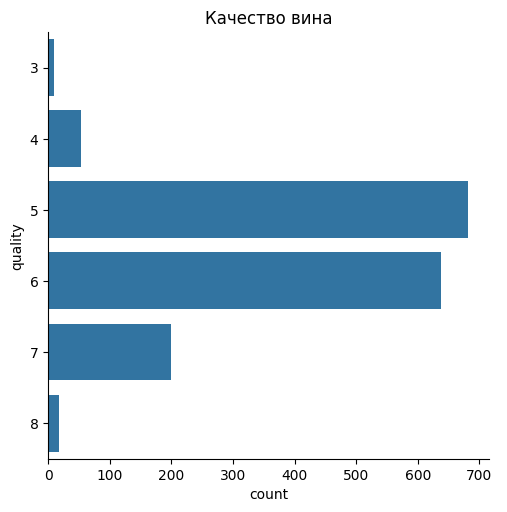

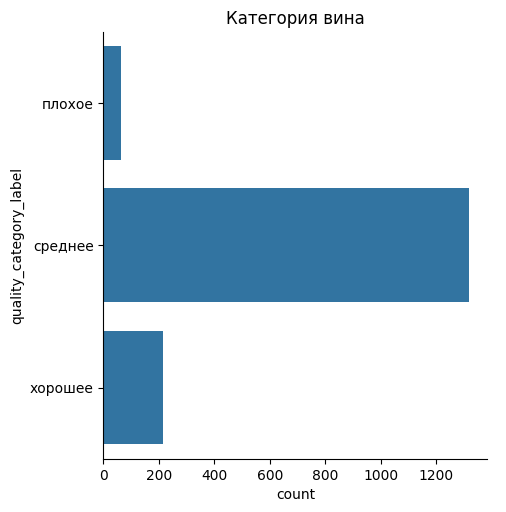

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y='quality', data=data,kind='count')
plt.title('Качество вина')
sns.catplot(y='quality_category_label', data=data,kind='count')
plt.title('Категория вина')
plt.show()

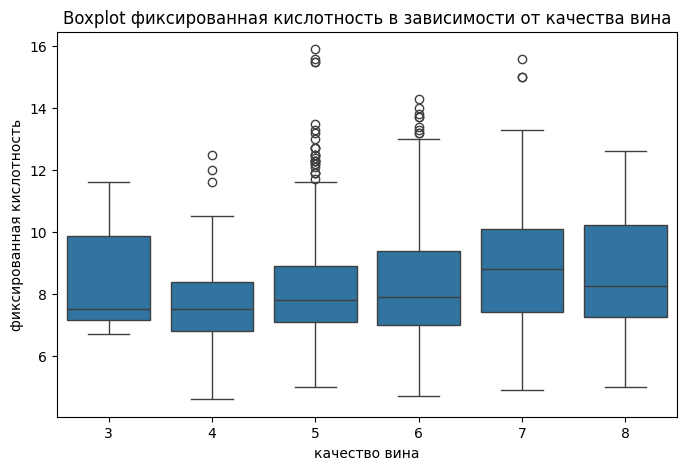

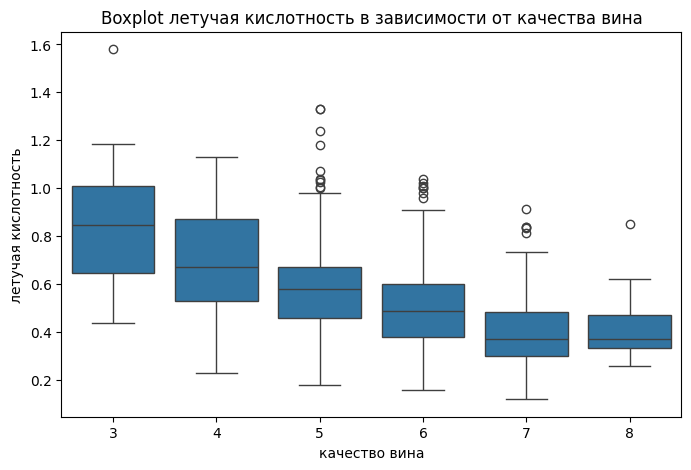

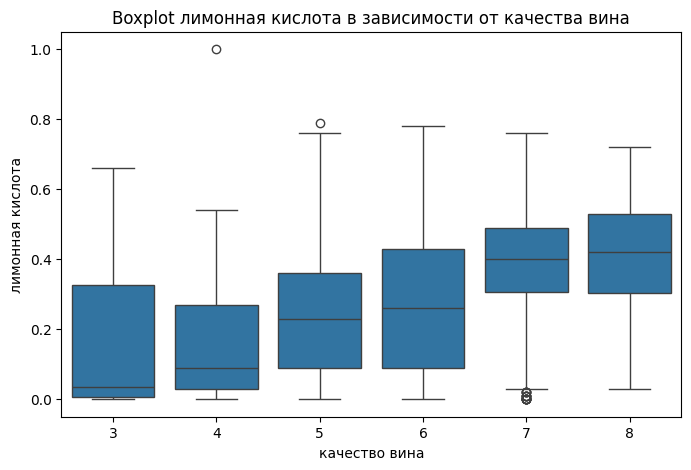

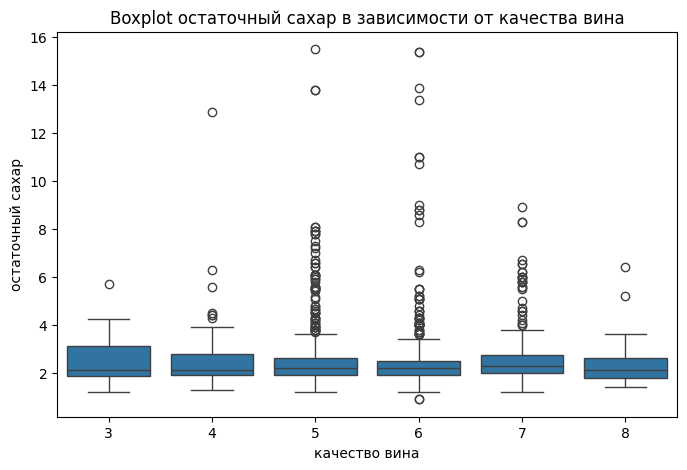

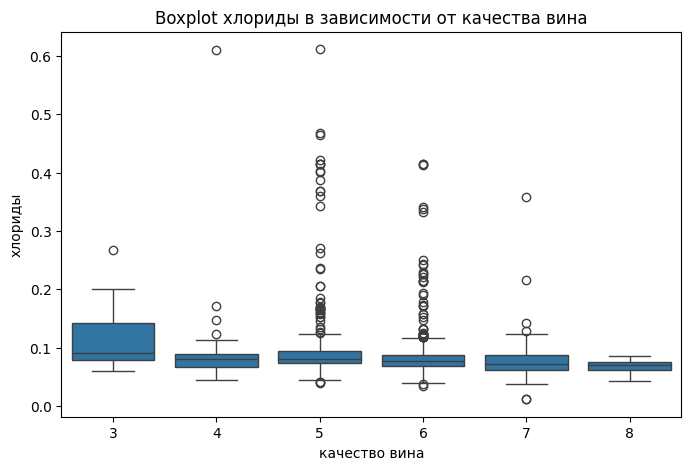

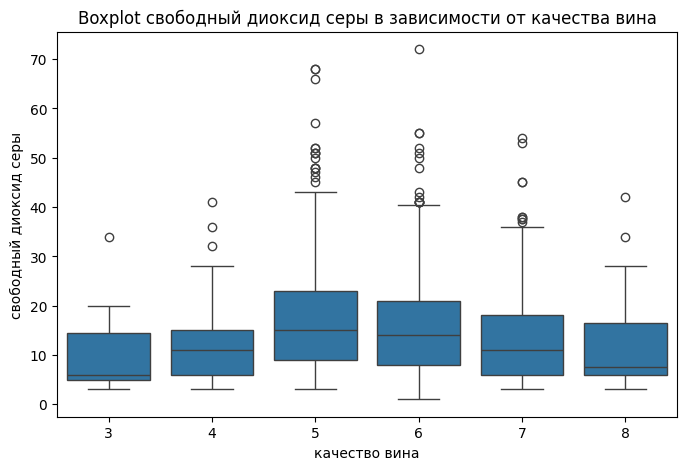

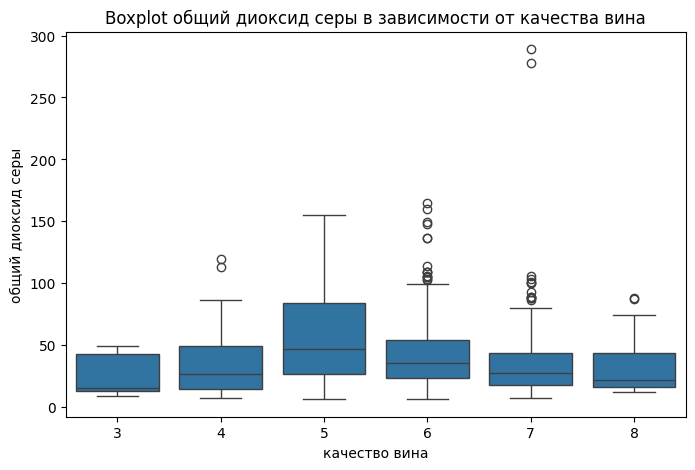

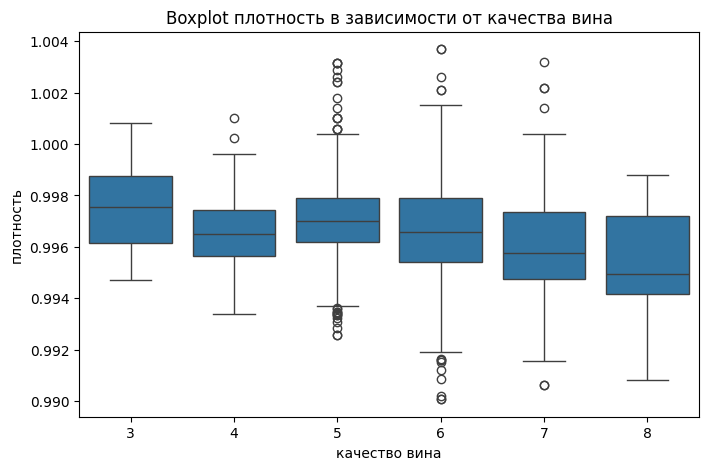

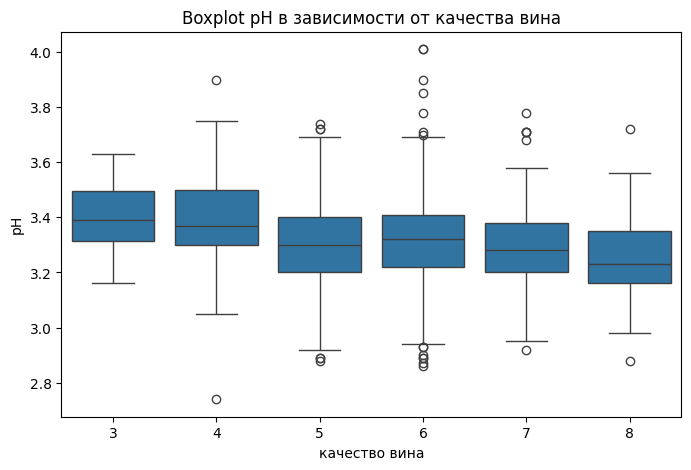

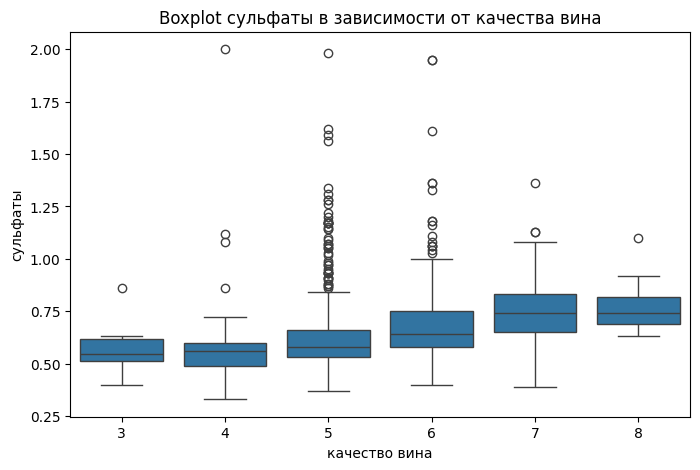

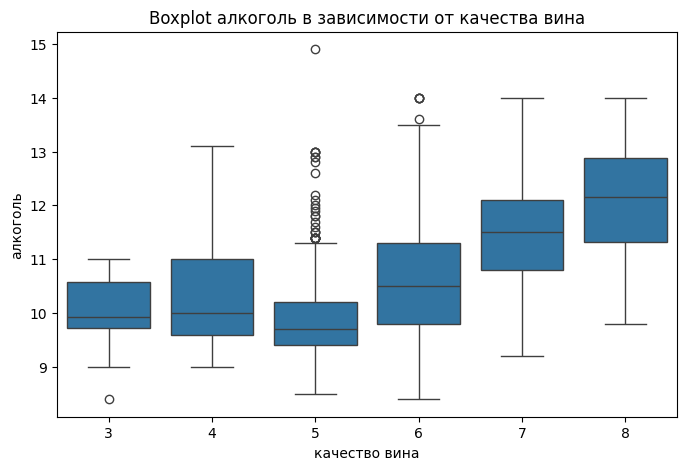

In [77]:
num_cols = data.select_dtypes(include=['float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='quality', y=col, data=data)
    #plt.scatter(data.quality, data[col])
    plt.xlabel('качество вина')
    plt.ylabel(params[col])
    plt.title(f'Boxplot {params[col]} в зависимости от качества вина')
    plt.show()


In [78]:
data.isnull().sum() 

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
quality_category_label    0
quality_category          0
dtype: int64

In [192]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

import pandas as pd

def display_importances(model):
    try:
        feature_names=model.feature_names_in_
    except:
        feature_names=model.feature_names_
    importances=model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Фича': [ params[str(f).replace('_',' ')] for f in feature_names],
        'Важность': importances
    })


    feature_importance_df['Важность (%)'] = (
        feature_importance_df['Важность'] / feature_importance_df['Важность'].sum() * 100
    ).round(2)  # Округляем до 2 знаков
    
    feature_importance_df = feature_importance_df.sort_values('Важность (%)', ascending=False)
    print(feature_importance_df)    

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split

X = data.drop(['quality', 'quality_category','quality_category_label'], axis=1)
y = data['quality_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=241)
models=[]
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"RandomForestClassifier MSE: {mean_squared_error(y_test, y_pred):.2f}")
display_importances(model)


RandomForestClassifier MSE: 0.14
                         Фича  Важность  Важность (%)
10                   алкоголь  0.154985         15.50
1         летучая кислотность  0.116754         11.68
9                    сульфаты  0.106636         10.66
2            лимонная кислота  0.092621          9.26
6          общий диоксид серы  0.084005          8.40
7                   плотность  0.083464          8.35
4                     хлориды  0.082888          8.29
0   фиксированная кислотность  0.082404          8.24
3            остаточный сахар  0.073970          7.40
8                          pH  0.062239          6.22
5      свободный диоксид серы  0.060036          6.00


In [193]:
from sklearn.ensemble import GradientBoostingRegressor

model_sklearn = GradientBoostingRegressor(random_state=241)
model_sklearn.fit(X_train, y_train)
y_pred = model_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred)
print(f"Sklearn MSE: {mse_sklearn:.4f}")
display_importances(model_sklearn)

Sklearn MSE: 0.1200
                         Фича  Важность  Важность (%)
10                   алкоголь  0.288317         28.83
1         летучая кислотность  0.141569         14.16
9                    сульфаты  0.137056         13.71
6          общий диоксид серы  0.084969          8.50
0   фиксированная кислотность  0.072633          7.26
8                          pH  0.059456          5.95
7                   плотность  0.056699          5.67
5      свободный диоксид серы  0.052041          5.20
3            остаточный сахар  0.047870          4.79
4                     хлориды  0.031276          3.13
2            лимонная кислота  0.028115          2.81


In [184]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse_xgb:.4f}")
display_importances(model_xgb)

XGBoost MSE: 0.1359
                         Фича  Важность  Важность (%)
10                   алкоголь  0.265712         26.57
9                    сульфаты  0.119269         11.93
6          общий диоксид серы  0.108308         10.83
1         летучая кислотность  0.093002          9.30
8                          pH  0.081204          8.12
5      свободный диоксид серы  0.067484          6.75
3            остаточный сахар  0.061681          6.17
4                     хлориды  0.060305          6.03
2            лимонная кислота  0.049780          4.98
7                   плотность  0.046926          4.69
0   фиксированная кислотность  0.046328          4.63


In [185]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(random_state=42, verbose=0)
model_cat.fit(X_train, y_train)
y_pred = model_cat.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred)
print(f"CatBoost MSE: {mse_cat:.4f}")
display_importances(model_cat)

CatBoost MSE: 0.1127
                         Фича   Важность  Важность (%)
10                   алкоголь  14.832309         14.83
9                    сульфаты  13.405581         13.41
1         летучая кислотность  12.634970         12.63
6          общий диоксид серы   9.309475          9.31
0   фиксированная кислотность   9.256949          9.26
2            лимонная кислота   8.440556          8.44
7                   плотность   8.095600          8.10
3            остаточный сахар   6.633079          6.63
4                     хлориды   6.237008          6.24
8                          pH   6.244829          6.24
5      свободный диоксид серы   4.909645          4.91


In [195]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(random_state=42)
model_lgbm.fit(X_train, y_train)
y_pred = model_lgbm.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred)
print(f"LightGBM MSE: {mse_lgbm:.4f}")
display_importances(model_lgbm)

LightGBM MSE: 0.1153
                         Фича  Важность  Важность (%)
4                     хлориды       344         11.47
6          общий диоксид серы       331         11.03
10                   алкоголь       327         10.90
7                   плотность       320         10.67
0   фиксированная кислотность       295          9.83
1         летучая кислотность       275          9.17
9                    сульфаты       262          8.73
2            лимонная кислота       238          7.93
3            остаточный сахар       213          7.10
5      свободный диоксид серы       204          6.80
8                          pH       191          6.37


In [196]:
from sklearn.model_selection import GridSearchCV

params_sklearn = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
}

grid_sklearn = GridSearchCV(GradientBoostingRegressor(random_state=42), params_sklearn, cv=3, scoring='neg_mean_squared_error')
grid_sklearn.fit(X_train, y_train)
best_sklearn = grid_sklearn.best_estimator_
y_pred = best_sklearn.predict(X_test)
mse_sklearn_tuned = mean_squared_error(y_test, y_pred)
print(mse_sklearn_tuned)
display_importances(best_sklearn)

0.11736703197694748
                         Фича  Важность  Важность (%)
10                   алкоголь  0.317136         31.71
1         летучая кислотность  0.175634         17.56
9                    сульфаты  0.169517         16.95
6          общий диоксид серы  0.087930          8.79
0   фиксированная кислотность  0.056697          5.67
8                          pH  0.047145          4.71
5      свободный диоксид серы  0.040694          4.07
7                   плотность  0.030938          3.09
3            остаточный сахар  0.030472          3.05
4                     хлориды  0.022052          2.21
2            лимонная кислота  0.021785          2.18


In [197]:
params_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42), params_xgb, cv=3, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
mse_xgb_tuned = mean_squared_error(y_test, y_pred)
print(mse_xgb_tuned)
display_importances(best_xgb)

0.11396581679582596
                         Фича  Важность  Важность (%)
10                   алкоголь  0.215434     21.540001
1         летучая кислотность  0.123216     12.320000
9                    сульфаты  0.117094     11.710000
7                   плотность  0.082767      8.280000
6          общий диоксид серы  0.081551      8.160000
8                          pH  0.072330      7.230000
5      свободный диоксид серы  0.069118      6.910000
3            остаточный сахар  0.061092      6.110000
2            лимонная кислота  0.060645      6.060000
4                     хлориды  0.058452      5.850000
0   фиксированная кислотность  0.058300      5.830000


In [198]:
params_cat = {
    'iterations': [100, 200],
    'depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
}

grid_cat = GridSearchCV(CatBoostRegressor(random_state=42, verbose=0), params_cat, cv=3, scoring='neg_mean_squared_error')
grid_cat.fit(X_train, y_train)
best_cat = grid_cat.best_estimator_
y_pred = best_cat.predict(X_test)
mse_cat_tuned = mean_squared_error(y_test, y_pred)
print(mse_cat_tuned)
display_importances(best_cat)

0.11528266873908848
                         Фича   Важность  Важность (%)
10                   алкоголь  22.987824         22.99
1         летучая кислотность  16.848820         16.85
9                    сульфаты  16.838054         16.84
6          общий диоксид серы   7.658051          7.66
2            лимонная кислота   7.545722          7.55
5      свободный диоксид серы   5.535862          5.54
0   фиксированная кислотность   5.049455          5.05
7                   плотность   4.845563          4.85
3            остаточный сахар   4.709445          4.71
8                          pH   4.262011          4.26
4                     хлориды   3.719194          3.72


In [199]:
if mse_lgbm_tuned:
    mse_lgbm_tuned_old=mse_lgbm_tuned
params_lgbm = {
    'n_estimators': [50, 50],
    'max_depth': [10, 15],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1.0],
    'min_child_samples':[4,4],
}

grid_lgbm = GridSearchCV(LGBMRegressor(random_state=42,verbose=-1), params_lgbm, cv=3, scoring='neg_mean_squared_error')
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_
y_pred = best_lgbm.predict(X_test)
mse_lgbm_tuned = mean_squared_error(y_test, y_pred)
if mse_lgbm_tuned_old-mse_lgbm_tuned<0:
    print("Хуже")
    print(mse_lgbm_tuned_old,mse_lgbm_tuned)
    print(mse_lgbm_tuned_old-mse_lgbm_tuned)
print(mse_lgbm_tuned)
display_importances(best_lgbm)

0.11406762119693142
                         Фича  Важность  Важность (%)
6          общий диоксид серы       179         11.93
1         летучая кислотность       163         10.87
7                   плотность       155         10.33
3            остаточный сахар       143          9.53
10                   алкоголь       141          9.40
4                     хлориды       137          9.13
0   фиксированная кислотность       131          8.73
9                    сульфаты       122          8.13
5      свободный диоксид серы       119          7.93
2            лимонная кислота       113          7.53
8                          pH        97          6.47
